In [109]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker # to show the high K values in the bar charts

csvpath = os.path.join("California_Fire_Incidents.csv")
calfire = pd.read_csv(csvpath)

# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#clean up the dataset
columns_to_drop = ['Active', 'Featured', 'Final', 'PercentContained', 'Public', 'SearchKeywords', 'Status']
calfire.drop(columns_to_drop, axis='columns', inplace=True)
# Convert datetime columns with UTC timezone parsing
calfire['Started'] = pd.to_datetime(calfire['Started'], format='ISO8601')
calfire['Updated'] = pd.to_datetime(calfire['Updated'], format='ISO8601')
calfire['Extinguished'] = pd.to_datetime(calfire['Extinguished'], format='ISO8601')
calfire['YearStarted'] = calfire['Started'].dt.year
calfire['MonthStarted'] = calfire['Started'].dt.month
calfire = calfire[calfire.YearStarted != 1969]
# Fill NA values
calfire.fillna({'AcresBurned': 0, 'AirTankers': 0, 'ConditionStatement':'', 'ControlStatement':'',
                'CrewsInvolved': 0, 'Dozers': 0, 'Engines': 0, 'Extinguished': 0, 'Fatalities': 0,
               'FuelType':'', 'Helicopters': 0, 'Injuries': 0, 'PersonnelInvolved': 0,
               'SearchDescription':'', 'StructuresDamaged': 0, 'StructuresDestroyed': 0,
               'StructuresEvacuated': 0, 'StructuresThreatened': 0, 'WaterTenders': 0}, inplace=True)
# Convert to appropriate integer types
int_columns = ['AcresBurned', 'AirTankers', 'CrewsInvolved', 'Dozers', 'Engines',
               'Fatalities', 'Injuries', 'Helicopters', 'PersonnelInvolved',
               'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated',
               'StructuresThreatened', 'WaterTenders']
for col in int_columns:
    calfire[col] = calfire[col].astype('int64')
# Return the DataFrame
calfire.head()

,AcresBurned,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PersonnelInvolved,SearchDescription,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,YearStarted,MonthStarted
0,257314,Stanislaus National Forest/Yosemite National Park,0,2013,True,/incidents/2013/8/17/rim-fire/,,,Tuolumne,55,0,0,0,2013-09-06 18:30:00+00:00,0,,0,0,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,0,The Rim Fire was east of Groveland along Highw...,2013-08-17 15:25:00+00:00,0,0,0,0,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06 18:30:00+00:00,0,2013,8
1,30274,USFS Angeles National Forest/Los Angeles Count...,0,2013,True,/incidents/2013/5/30/powerhouse-fire/,,,Los Angeles,19,0,0,0,2013-06-08 18:30:00+00:00,0,,0,0,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,0,The Powerhouse Fire burned in May and June 201...,2013-05-30 15:28:00+00:00,0,0,0,0,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08 18:30:00+00:00,0,2013,5
2,27531,CAL FIRE Riverside Unit / San Bernardino Natio...,0,2013,True,/incidents/2013/7/15/mountain-fire/,,,Riverside,33,0,0,0,2013-07-30 18:00:00+00:00,0,,0,0,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,0,The Mountain Fire burned in July 2013 off High...,2013-07-15 13:43:00+00:00,0,0,0,0,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30 18:00:00+00:00,0,2013,7
3,27440,Tahoe National Forest,0,2013,False,/incidents/2013/8/10/american-fire/,,,Placer,31,0,0,0,2013-08-30 08:00:00+00:00,0,,0,0,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,0,The American Fire burned in August 2013 off De...,2013-08-10 16:30:00+00:00,0,0,0,0,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30 08:00:00+00:00,0,2013,8
4,24251,Ventura County Fire/CAL FIRE,0,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,,Ventura,56,47,8,117,2013-05-11 06:30:00+00:00,0,,11,10,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,2167,"The Springs Fire burned in May 2013, Southboun...",2013-05-02 07:01:00+00:00,6,10,0,0,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11 06:30:00+00:00,11,2013,5


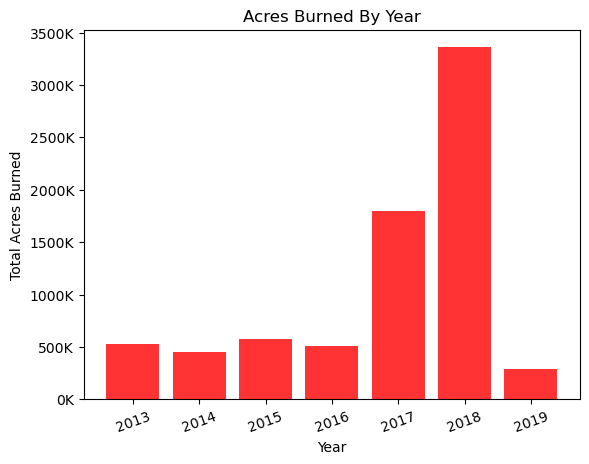

In [ ]:
# Show the acres burned per year.
burns_by_year = calfire.groupby('ArchiveYear')['AcresBurned'].sum().reset_index()

plt.bar(burns_by_year["ArchiveYear"],burns_by_year["AcresBurned"], color = 'red', alpha =0.8)
plt.title('Acres Burned By Year')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.xticks(rotation=20)

#use mticker to show the values on the y_axis in "K"
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [97]:
# Only including the fires that involved a firefighter crew.
calfire_filtered = calfire[calfire['CrewsInvolved']>0]

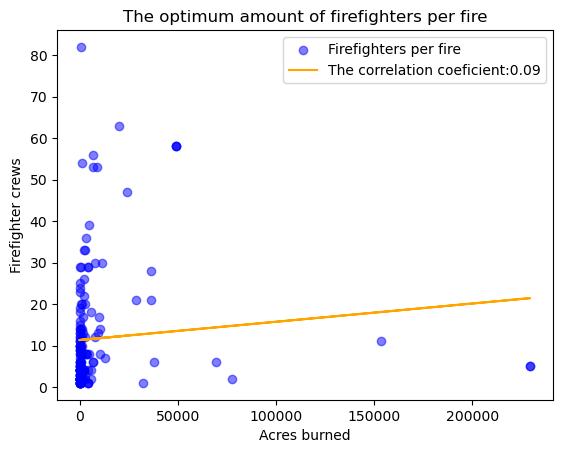

In [98]:
#Calculate the linear regression between acres burneed and the amount of fire fighters
X = calfire_filtered['AcresBurned']
y = calfire_filtered['CrewsInvolved']

#Create a linear regression with Numpy
m ,c =np.polyfit(X,y, 1)

#Plot scatter plot
plt.scatter(X,y, label = "Firefighter crews per fire", color="blue", alpha=0.5)

#Calculate the regression line
plt.plot(X,m * X + c, color = "orange", label= f"Fit: y = {m:.2f}x+{c:.2f}" )

# Calculate the correlation between the amount of fire fighters and the area burned
acres_per_firefighter_correlation = calfire_filtered[["AcresBurned","CrewsInvolved"]].corr().iloc[0,1]

plt.xlabel("Acres burned")
plt.ylabel("Firefighter crews")
plt.title ("The optimum amount of firefighters per fire")
plt.legend([
    "Firefighters per fire",
    f"The correlation coeficient:{acres_per_firefighter_correlation:.2f}"])
plt.show()

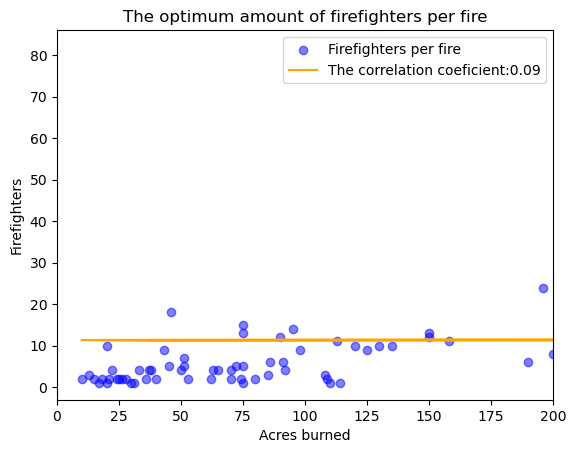

In [114]:
# Limit Acres Burned to show 
X = calfire_filtered['AcresBurned']
y = calfire_filtered['CrewsInvolved']

#Create a linear regression with Numpy
m ,c =np.polyfit(X,y, 1)

#Plot scatter plot
plt.scatter(X,y, label = "Firefighter per < 1000 acres", color="blue", alpha=0.5)

#Calculate the regression line
plt.plot(X,m * X + c, color = "orange", label= f"Fit: y = {m:.2f}x+{c:.2f}" )

# Calculate the correlation between the amount of fire fighters and the area burned
acres_per_firefighter_correlation = calfire_filtered[["AcresBurned","CrewsInvolved"]].corr().iloc[0,1]

plt.xlabel("Acres burned")
plt.ylabel("Firefighters")
plt.title ("The optimum amount of firefighters per fire")
plt.legend([
    "Firefighters per fire",
    f"The correlation coeficient:{acres_per_firefighter_correlation:.2f}"])
plt.xlim(0,200)
plt.show()